<a href="https://colab.research.google.com/github/Younus-Saberi/Glaucoma-Detection/blob/master/ImageClassificationCNNModel_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Ingestion and Preprocessing

In [2]:
import os
import numpy as np
import pandas as pd
import zipfile

with zipfile.ZipFile("/content/data/happy/happy.zip", 'r') as f:
  f.extractall(path="/content/data/happy")

In [ ]:
!zipinfo /content/sad/sad.zip

In [3]:
# Use to remove unnecssary file from the /content/ dir
import os
import glob

for file in glob.glob('/content/*'):
  if os.path.isfile(file):
    os.remove(file)

In [5]:
import cv2
import imghdr

In [9]:
data_dir = 'data'

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

In [7]:
img_exts = ['jpeg','jpg','bmp','png']

In [36]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      image_path = os.path.join(data_dir, image_class, image)
      try:
        img = cv.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print("Image not in exts list {}".format(image_path))
          os.remove(image_path)
      except Exception as e:
        print("Issue with the image {}".format(image_path))

Issue with the image data/sad/image25.jpeg
Issue with the image data/sad/teenager-422197_1280.jpg
Issue with the image data/sad/image10.jpeg
Issue with the image data/sad/people-thinking-sad-people-worried-people-depression-alone-hoodie-tshirt-hoodie-m-png-clipart.jpg
Issue with the image data/sad/Sad-People.jpg.webp
Issue with the image data/sad/images21.jpg
Issue with the image data/sad/n-lose-weight-and-overweight-fat-people-diet-unhealthy-unhappy-concept-photo.jpg
Issue with the image data/sad/sad-more-money.jpg
Issue with the image data/sad/pngtree-woman-looking-sad-in-the-rain-picture-image_2771069.jpg
Issue with the image data/sad/vector2.svg
Issue with the image data/sad/images5.jpg
Issue with the image data/sad/vector10.svg
Issue with the image data/sad/images14.jpg
Issue with the image data/sad/d8066b88bbaf60231ce47a3fd0292c39.jpg
Issue with the image data/sad/image27.jpeg
Issue with the image data/sad/images19.jpg
Issue with the image data/sad/image7.jpeg
Issue with the imag

In [21]:
img = cv2.imread(os.path.join('data','happy','Happy.jpg'))
img.shape

(388, 800, 3)

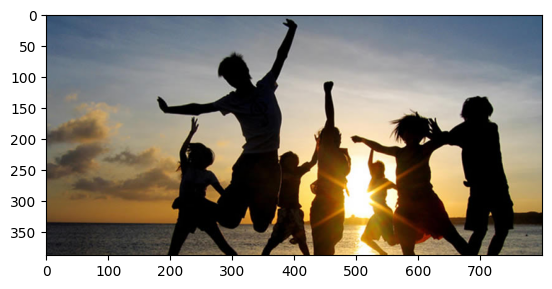

In [23]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Load Data

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 298 files belonging to 2 classes.


In [47]:
data_iterator = data.as_numpy_iterator()

In [57]:
# Get new data from the pipeline
batch = data_iterator.next()

In [60]:
batch[0].shape

(32, 256, 256, 3)

In [58]:
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

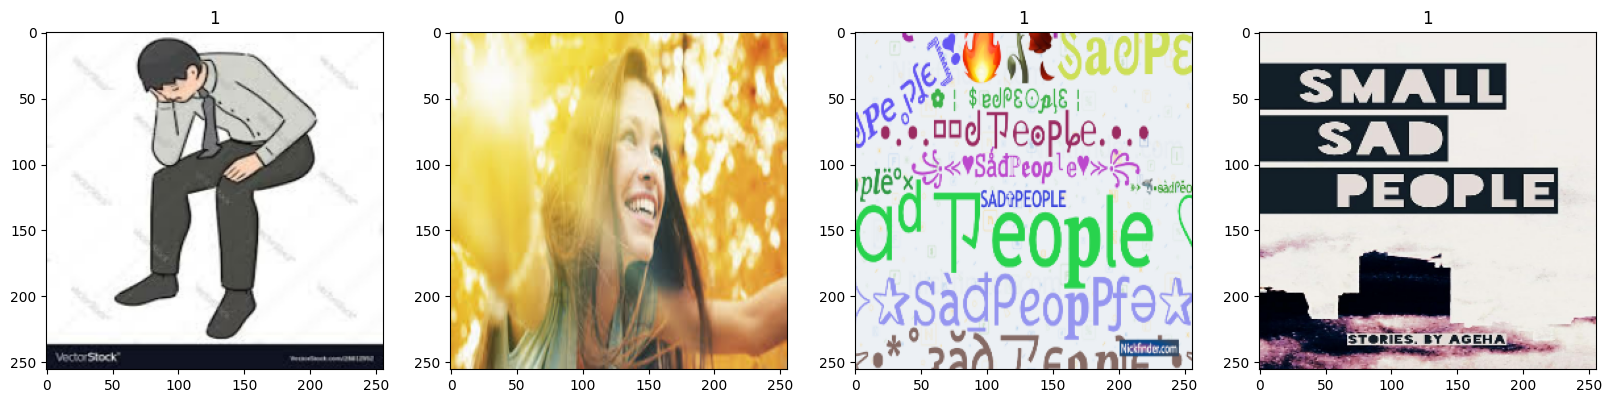

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])